In [298]:
import pandas as pd
import numpy as np
import math

# Exerices 0：Load data from data.xlsx
## Preprocessing data in a correct and readable manner



In [58]:
# Read mutli-sheets in excel

xls = pd.ExcelFile('data.xlsx')
df1 = pd.read_excel(xls, 'Daily')
df2 = pd.read_excel(xls, '1hr')
df3 = pd.read_excel(xls, '5 min')
df4 = pd.read_excel(xls, '1min')
df5 = pd.read_excel(xls, 'Tick')


In [45]:
#data.head()
df1.head()

,AAPL US Equity,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Date,PX_OPEN,PX_HIGH,PX_LOW,PX_LAST,PX_VOLUME,NUM_TRADES,VOLUME_WEIGHTED_AVG_PX
1,2015-01-02 00:00:00,111.39,111.44,107.35,109.33,53204626,287276,109.133
2,2015-01-05 00:00:00,108.29,108.65,105.41,106.25,64285491,317900,106.784
3,2015-01-06 00:00:00,106.54,107.43,104.63,106.26,65797116,364285,106.114
4,2015-01-07 00:00:00,107.2,108.2,106.695,107.75,40105934,222430,107.646


In [218]:
df1['PX_OPEN'].describe()

count     252.00
unique    236.00
top       116.04
freq        3.00
Name: PX_OPEN, dtype: float64

In [59]:
df2.head()

,AAPL US Equity,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,AAPL US Equity.1,...,Unnamed: 16,Unnamed: 17,AAPL US Equity.2,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,BarTp=T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BarTp=B,...,NaN,NaN,BarTp=A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Date,OPEN,HIGH,LOW,LAST_PRICE,NUMBER_TICKS,VOLUME,VALUE,NaN,Date,...,VALUE,NaN,Date,OPEN,HIGH,LOW,LAST_PRICE,NUMBER_TICKS,VOLUME,VALUE
2,2016-01-04 09:30:00,102.61,103.69,102,102.67,44010,9306102,956512128,NaN,2016-01-04 09:30:00,...,31671954,NaN,2016-01-04 09:30:00,102.41,103.7,102.02,102.69,54150,239337,24630474
3,2016-01-04 10:00:00,102.68,103.59,102.38,103.28,27462,4819634,496242144,NaN,2016-01-04 10:00:00,...,47126300,NaN,2016-01-04 10:00:00,102.69,103.59,102.43,103.28,75173,477955,49204884
4,2016-01-04 10:30:00,103.28,103.935,103.01,103.338,22162,3886368,401830496,NaN,2016-01-04 10:30:00,...,40699960,NaN,2016-01-04 10:30:00,103.28,103.94,103.01,103.34,55279,364388,37657056


In [47]:
df3.head()

,AAPL US Equity,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,AAPL US Equity.1,...,Unnamed: 16,Unnamed: 17,AAPL US Equity.2,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,BarTp=T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BarTp=B,...,NaN,NaN,BarTp=A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Date,OPEN,HIGH,LOW,LAST_PRICE,NUMBER_TICKS,VOLUME,VALUE,NaN,Date,...,VALUE,NaN,Date,OPEN,HIGH,LOW,LAST_PRICE,NUMBER_TICKS,VOLUME,VALUE
2,2016-01-04 09:30:00,102.61,102.82,102,102.26,10739,3056906,312927488,NaN,2016-01-04 09:30:00,...,7673177,NaN,2016-01-04 09:30:00,102.41,102.82,102.02,102.27,5847,19544,2.00037e+06
3,2016-01-04 09:35:00,102.25,103.61,102.25,103.5,10190,1902193,195863984,NaN,2016-01-04 09:35:00,...,4.06626e+06,NaN,2016-01-04 09:35:00,102.26,103.62,102.26,103.52,10194,55363,5.69834e+06
4,2016-01-04 09:40:00,103.5,103.69,102.6,102.61,8763,1801690,185863856,NaN,2016-01-04 09:40:00,...,3.5023e+06,NaN,2016-01-04 09:40:00,103.52,103.7,102.61,102.64,9310,34957,3.6078e+06


In [48]:
df4.head()

,AAPL US Equity,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,AAPL US Equity.1,...,Unnamed: 16,Unnamed: 17,AAPL US Equity.2,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,BarTp=T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BarTp=B,...,NaN,NaN,BarTp=A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Date,OPEN,HIGH,LOW,LAST_PRICE,NUMBER_TICKS,VOLUME,VALUE,NaN,Date,...,VALUE,NaN,Date,OPEN,HIGH,LOW,LAST_PRICE,NUMBER_TICKS,VOLUME,VALUE
2,2016-01-19 09:30:00,98.41,98.51,98.14,98.34,1355,857753,84373056,NaN,2016-01-19 09:30:00,...,259308,NaN,2016-01-19 09:30:00,98.38,98.49,98.16,98.36,1010,3850,378681
3,2016-01-19 09:31:00,98.3314,98.65,98.3,98.44,1337,290059,28572824,NaN,2016-01-19 09:31:00,...,338298,NaN,2016-01-19 09:31:00,98.35,98.65,98.31,98.44,791,3784,372757
4,2016-01-19 09:32:00,98.43,98.5399,98.35,98.43,895,148454,14613426,NaN,2016-01-19 09:32:00,...,269990,NaN,2016-01-19 09:32:00,98.44,98.55,98.36,98.45,778,2299,226332


In [33]:
df5.head()

,AAPL US Equity,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,2016-01-19 09:30:00,TRADE,98.41,135
1,2016-01-19 09:30:00,TRADE,98.42,100
2,2016-01-19 09:30:00,TRADE,98.41,100
3,2016-01-19 09:30:00,BEST_BID,98.41,2
4,2016-01-19 09:30:00,BEST_BID,98.43,10


### Transform Data Header for sheets (Daily, 1 hr, 5min, 1min, Tick)

In [200]:
# rename the header
new_header = df1.iloc[0] #grab the first row for the header
df1 = df1[1:] #take the data less the header row
df1.columns = new_header #set the header row as the df header
#df = data[:]

#### Daily

In [201]:
df1.head()

,Date,PX_OPEN,PX_HIGH,PX_LOW,PX_LAST,PX_VOLUME,NUM_TRADES,VOLUME_WEIGHTED_AVG_PX
1,2015-01-02 00:00:00,111.39,111.44,107.35,109.33,53204626,287276,109.133
2,2015-01-05 00:00:00,108.29,108.65,105.41,106.25,64285491,317900,106.784
3,2015-01-06 00:00:00,106.54,107.43,104.63,106.26,65797116,364285,106.114
4,2015-01-07 00:00:00,107.2,108.2,106.695,107.75,40105934,222430,107.646
5,2015-01-08 00:00:00,109.23,112.15,108.7,111.89,59364547,304607,111.041


#### 1hr

In [163]:
# rename the header
new_header_2 = df2.iloc[1] #grab the first row for the header
df2_ = df2[0:] #take the data less the header row
df2_.columns = new_header_2 #set the header row as the df header
#df = data[:]
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 26 columns):
AAPL US Equity      210 non-null object
Unnamed: 1          209 non-null object
Unnamed: 2          209 non-null object
Unnamed: 3          209 non-null object
Unnamed: 4          209 non-null object
Unnamed: 5          209 non-null object
Unnamed: 6          209 non-null object
Unnamed: 7          209 non-null object
Unnamed: 8          0 non-null float64
AAPL US Equity.1    210 non-null object
Unnamed: 10         209 non-null object
Unnamed: 11         209 non-null object
Unnamed: 12         209 non-null object
Unnamed: 13         209 non-null object
Unnamed: 14         209 non-null object
Unnamed: 15         209 non-null object
Unnamed: 16         209 non-null object
Unnamed: 17         0 non-null float64
AAPL US Equity.2    210 non-null object
Unnamed: 19         209 non-null object
Unnamed: 20         209 non-null object
Unnamed: 21         209 non-null object
Unnamed: 22      

In [131]:
df2_.head()

1,Date,OPEN,HIGH,LOW,LAST_PRICE,NUMBER_TICKS,VOLUME,VALUE,nan,Date,...,VALUE,nan,Date,OPEN,HIGH,LOW,LAST_PRICE,NUMBER_TICKS,VOLUME,VALUE
0,BarTp=T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BarTp=B,...,NaN,NaN,BarTp=A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Date,OPEN,HIGH,LOW,LAST_PRICE,NUMBER_TICKS,VOLUME,VALUE,NaN,Date,...,VALUE,NaN,Date,OPEN,HIGH,LOW,LAST_PRICE,NUMBER_TICKS,VOLUME,VALUE
2,2016-01-04 09:30:00,102.61,103.69,102,102.67,44010,9306102,956512128,NaN,2016-01-04 09:30:00,...,31671954,NaN,2016-01-04 09:30:00,102.41,103.7,102.02,102.69,54150,239337,24630474
3,2016-01-04 10:00:00,102.68,103.59,102.38,103.28,27462,4819634,496242144,NaN,2016-01-04 10:00:00,...,47126300,NaN,2016-01-04 10:00:00,102.69,103.59,102.43,103.28,75173,477955,49204884
4,2016-01-04 10:30:00,103.28,103.935,103.01,103.338,22162,3886368,401830496,NaN,2016-01-04 10:30:00,...,40699960,NaN,2016-01-04 10:30:00,103.28,103.94,103.01,103.34,55279,364388,37657056


##### Create BarTp=T, BarTp=B, BarTp=A
##### 1hr: T

In [141]:
df2_T = df2_.iloc[:,[0,1,2,3,4,5,6,7]]

In [142]:
df2_T.head()

1,Date,OPEN,HIGH,LOW,LAST_PRICE,NUMBER_TICKS,VOLUME,VALUE
0,BarTp=T,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Date,OPEN,HIGH,LOW,LAST_PRICE,NUMBER_TICKS,VOLUME,VALUE
2,2016-01-04 09:30:00,102.61,103.69,102,102.67,44010,9306102,956512128
3,2016-01-04 10:00:00,102.68,103.59,102.38,103.28,27462,4819634,496242144
4,2016-01-04 10:30:00,103.28,103.935,103.01,103.338,22162,3886368,401830496


In [171]:
df2_T.tail()
df2_T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
Date            210 non-null object
OPEN            209 non-null object
HIGH            209 non-null object
LOW             209 non-null object
LAST_PRICE      209 non-null object
NUMBER_TICKS    209 non-null object
VOLUME          209 non-null object
VALUE           209 non-null object
dtypes: object(8)
memory usage: 13.2+ KB


In [144]:
new_header_2 = df2_T.iloc[1]

#print('old')
#print(df2_T.index)
df2_T_ = df2_T[3:] #take the data less the header row
df2_T_.columns = new_header_2 #set the header row as the df header
df2_T_.head()


1,Date,OPEN,HIGH,LOW,LAST_PRICE,NUMBER_TICKS,VOLUME,VALUE
3,2016-01-04 10:00:00,102.68,103.59,102.38,103.28,27462,4819634,496242144
4,2016-01-04 10:30:00,103.28,103.935,103.01,103.338,22162,3886368,401830496
5,2016-01-04 11:00:00,103.33,103.47,102.5,103.4,18603,3251998,335462688
6,2016-01-04 11:30:00,103.39,103.9,103.205,103.83,14243,2484697,257469152
7,2016-01-04 12:00:00,103.83,104.05,103.69,103.87,12023,2274711,236232304


In [147]:
new_index = [x for x in range(1,208)]
#print(new_index)
df2_T_.set_axis(new_index)
#df2_T_.reindex(start = 1, stop = 209, step =1)
#df2_T_.reset_index()
df2_T_.head()
#df2_T_.tail()

/Users/liyingellie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


1,Date,OPEN,HIGH,LOW,LAST_PRICE,NUMBER_TICKS,VOLUME,VALUE
1,2016-01-04 10:00:00,102.68,103.59,102.38,103.28,27462,4819634,496242144
2,2016-01-04 10:30:00,103.28,103.935,103.01,103.338,22162,3886368,401830496
3,2016-01-04 11:00:00,103.33,103.47,102.5,103.4,18603,3251998,335462688
4,2016-01-04 11:30:00,103.39,103.9,103.205,103.83,14243,2484697,257469152
5,2016-01-04 12:00:00,103.83,104.05,103.69,103.87,12023,2274711,236232304


In [148]:
df2_T_.tail()

1,Date,OPEN,HIGH,LOW,LAST_PRICE,NUMBER_TICKS,VOLUME,VALUE
203,2016-01-26 13:30:00,100.225,100.35,100.015,100.115,10592,2074842,207784240
204,2016-01-26 14:00:00,100.112,100.205,99.98,100.125,14539,2731729,273353696
205,2016-01-26 14:30:00,100.125,100.88,100.12,100.345,21510,4733372,475896608
206,2016-01-26 15:00:00,100.345,100.406,99.04,99.47,25610,5614940,559971392
207,2016-01-26 15:30:00,99.47,100.04,99.26,99.99,47532,10311295,1027079104


##### 1hr B

In [149]:
#df2_B = df2_.iloc[:,[0,1,2,3,4,5,6,7]+9]
df2_B = df2_.iloc[:,[9,10,11,12,13,14,15,16]]
df2_B.head()

1,Date,OPEN,HIGH,LOW,LAST_PRICE,NUMBER_TICKS,VOLUME,VALUE
0,BarTp=B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Date,OPEN,HIGH,LOW,LAST_PRICE,NUMBER_TICKS,VOLUME,VALUE
2,2016-01-04 09:30:00,102.4,103.69,102,102.68,54484,308265,31671954
3,2016-01-04 10:00:00,102.68,103.57,102.42,103.27,77265,457872,47126300
4,2016-01-04 10:30:00,103.27,103.93,103,103.33,56858,393803,40699960


In [150]:
df2_B.tail()

1,Date,OPEN,HIGH,LOW,LAST_PRICE,NUMBER_TICKS,VOLUME,VALUE
205,2016-01-26 13:30:00,100.22,100.34,100.01,100.11,30939,292764,29315880
206,2016-01-26 14:00:00,100.11,100.2,99.98,100.12,26857,277772,27793882
207,2016-01-26 14:30:00,100.12,100.87,100.11,100.34,40366,407113,40921956
208,2016-01-26 15:00:00,100.34,100.4,99.04,99.47,58676,474037,47318508
209,2016-01-26 15:30:00,99.47,100.01,99.26,99.86,72223,873769,86996400


In [151]:
new_header_2_B = df2_B.iloc[1]

#print('old')
#print(df2_T.index)
df2_B_ = df2_B[3:] #take the data less the header row
df2_B_.columns = new_header_2_B #set the header row as the df header
df2_B_.head()

1,Date,OPEN,HIGH,LOW,LAST_PRICE,NUMBER_TICKS,VOLUME,VALUE
3,2016-01-04 10:00:00,102.68,103.57,102.42,103.27,77265,457872,47126300
4,2016-01-04 10:30:00,103.27,103.93,103,103.33,56858,393803,40699960
5,2016-01-04 11:00:00,103.33,103.46,102.86,103.39,59773,398852,41137492
6,2016-01-04 11:30:00,103.39,103.89,103.2,103.82,43095,282755,29291924
7,2016-01-04 12:00:00,103.82,104.04,103.68,103.87,35724,256086,26591408


In [152]:
df2_B_.set_axis(new_index)
#df2_T_.reindex(start = 1, stop = 209, step =1)
#df2_T_.reset_index()
df2_B_.head()
#df2_T_.tail()

/Users/liyingellie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  """Entry point for launching an IPython kernel.


1,Date,OPEN,HIGH,LOW,LAST_PRICE,NUMBER_TICKS,VOLUME,VALUE
1,2016-01-04 10:00:00,102.68,103.57,102.42,103.27,77265,457872,47126300
2,2016-01-04 10:30:00,103.27,103.93,103,103.33,56858,393803,40699960
3,2016-01-04 11:00:00,103.33,103.46,102.86,103.39,59773,398852,41137492
4,2016-01-04 11:30:00,103.39,103.89,103.2,103.82,43095,282755,29291924
5,2016-01-04 12:00:00,103.82,104.04,103.68,103.87,35724,256086,26591408


##### 1hr A

In [155]:
df2_A = df2_.iloc[:,[18,19,20,21,22,23,24,25]]
df2_A.head()

1,Date,OPEN,HIGH,LOW,LAST_PRICE,NUMBER_TICKS,VOLUME,VALUE
0,BarTp=A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Date,OPEN,HIGH,LOW,LAST_PRICE,NUMBER_TICKS,VOLUME,VALUE
2,2016-01-04 09:30:00,102.41,103.7,102.02,102.69,54150,239337,24630474
3,2016-01-04 10:00:00,102.69,103.59,102.43,103.28,75173,477955,49204884
4,2016-01-04 10:30:00,103.28,103.94,103.01,103.34,55279,364388,37657056


In [382]:
new_header_2_A = df2_A.iloc[1]
df2_A_ = df2_A[3:] #take the data less the header row
df2_A_.columns = new_header_2_A #set the header row as the df header
df2_A_.head()

1,Date,OPEN,HIGH,LOW,LAST_PRICE,NUMBER_TICKS,VOLUME,VALUE
3,2016-01-04 10:00:00,102.69,103.59,102.43,103.28,75173,477955,49204884
4,2016-01-04 10:30:00,103.28,103.94,103.01,103.34,55279,364388,37657056
5,2016-01-04 11:00:00,103.34,103.47,102.87,103.4,62990,407426,42028720
6,2016-01-04 11:30:00,103.4,103.9,103.21,103.83,42505,294020,30463552
7,2016-01-04 12:00:00,103.83,104.05,103.69,103.88,37116,259487,26949260


In [157]:
df2_A_.set_axis(new_index)
df2_A_.head()

/Users/liyingellie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  """Entry point for launching an IPython kernel.


1,Date,OPEN,HIGH,LOW,LAST_PRICE,NUMBER_TICKS,VOLUME,VALUE
1,2016-01-04 10:00:00,102.68,103.57,102.42,103.27,77265,457872,47126300
2,2016-01-04 10:30:00,103.27,103.93,103,103.33,56858,393803,40699960
3,2016-01-04 11:00:00,103.33,103.46,102.86,103.39,59773,398852,41137492
4,2016-01-04 11:30:00,103.39,103.89,103.2,103.82,43095,282755,29291924
5,2016-01-04 12:00:00,103.82,104.04,103.68,103.87,35724,256086,26591408


#### 5 min

In [189]:
print(df3.info())
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 26 columns):
AAPL US Equity      860 non-null object
Unnamed: 1          859 non-null object
Unnamed: 2          859 non-null object
Unnamed: 3          859 non-null object
Unnamed: 4          859 non-null object
Unnamed: 5          859 non-null object
Unnamed: 6          859 non-null object
Unnamed: 7          859 non-null object
Unnamed: 8          0 non-null float64
AAPL US Equity.1    860 non-null object
Unnamed: 10         859 non-null object
Unnamed: 11         859 non-null object
Unnamed: 12         859 non-null object
Unnamed: 13         859 non-null object
Unnamed: 14         859 non-null object
Unnamed: 15         859 non-null object
Unnamed: 16         859 non-null object
Unnamed: 17         0 non-null float64
AAPL US Equity.2    860 non-null object
Unnamed: 19         859 non-null object
Unnamed: 20         859 non-null object
Unnamed: 21         859 non-null object
Unnamed: 22      

,AAPL US Equity,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,AAPL US Equity.1,...,Unnamed: 16,Unnamed: 17,AAPL US Equity.2,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,BarTp=T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BarTp=B,...,NaN,NaN,BarTp=A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Date,OPEN,HIGH,LOW,LAST_PRICE,NUMBER_TICKS,VOLUME,VALUE,NaN,Date,...,VALUE,NaN,Date,OPEN,HIGH,LOW,LAST_PRICE,NUMBER_TICKS,VOLUME,VALUE
2,2016-01-04 09:30:00,102.61,102.82,102,102.26,10739,3056906,312927488,NaN,2016-01-04 09:30:00,...,7673177,NaN,2016-01-04 09:30:00,102.41,102.82,102.02,102.27,5847,19544,2.00037e+06
3,2016-01-04 09:35:00,102.25,103.61,102.25,103.5,10190,1902193,195863984,NaN,2016-01-04 09:35:00,...,4.06626e+06,NaN,2016-01-04 09:35:00,102.26,103.62,102.26,103.52,10194,55363,5.69834e+06
4,2016-01-04 09:40:00,103.5,103.69,102.6,102.61,8763,1801690,185863856,NaN,2016-01-04 09:40:00,...,3.5023e+06,NaN,2016-01-04 09:40:00,103.52,103.7,102.61,102.64,9310,34957,3.6078e+06



##### Create BarTp=T, BarTp=B, BarTp=A
##### 5 min T

In [183]:
df3_T = df3.iloc[:,[0,1,2,3,4,5,6,7]]
new_header_3 = df3_T.iloc[1]


df3_T_ = df3_T[3:] #take the data less the header row
df3_T_.columns = new_header_3 #set the header row as the df header
print(df3_T_.info())
print(df3_T_.head())
print(df3_T_.tail())
#df3_T_.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 3 to 859
Data columns (total 8 columns):
Date            857 non-null object
OPEN            857 non-null object
HIGH            857 non-null object
LOW             857 non-null object
LAST_PRICE      857 non-null object
NUMBER_TICKS    857 non-null object
VOLUME          857 non-null object
VALUE           857 non-null object
dtypes: object(8)
memory usage: 53.6+ KB
None
1                 Date     OPEN    HIGH     LOW LAST_PRICE NUMBER_TICKS  \
3  2016-01-04 09:35:00   102.25  103.61  102.25      103.5        10190   
4  2016-01-04 09:40:00    103.5  103.69   102.6     102.61         8763   
5  2016-01-04 09:45:00  102.634  103.23  102.43     103.02         5522   
6  2016-01-04 09:50:00   103.02  103.06  102.85     102.87         5115   
7  2016-01-04 09:55:00  102.865  102.94  102.67     102.67         3681   

1   VOLUME      VALUE  
3  1902193  195863984  
4  1801690  185863856  
5  1045341  107526968  
6   835372   86

In [184]:
new_index2 = [x for x in range(1,858)]
df3_T_.set_axis(new_index2)
print(df3_T_.info())
print(df3_T_.head())
print(df3_T_.tail())
df3_T_.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 857 entries, 1 to 857
Data columns (total 8 columns):
Date            857 non-null object
OPEN            857 non-null object
HIGH            857 non-null object
LOW             857 non-null object
LAST_PRICE      857 non-null object
NUMBER_TICKS    857 non-null object
VOLUME          857 non-null object
VALUE           857 non-null object
dtypes: object(8)
memory usage: 60.3+ KB
None
1                 Date     OPEN    HIGH     LOW LAST_PRICE NUMBER_TICKS  \
1  2016-01-04 09:35:00   102.25  103.61  102.25      103.5        10190   
2  2016-01-04 09:40:00    103.5  103.69   102.6     102.61         8763   
3  2016-01-04 09:45:00  102.634  103.23  102.43     103.02         5522   
4  2016-01-04 09:50:00   103.02  103.06  102.85     102.87         5115   
5  2016-01-04 09:55:00  102.865  102.94  102.67     102.67         3681   

1   VOLUME      VALUE  
1  1902193  195863984  
2  1801690  185863856  
3  1045341  107526968  
4   835372   86

/Users/liyingellie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  


1,Date,OPEN,HIGH,LOW,LAST_PRICE,NUMBER_TICKS,VOLUME,VALUE
1,2016-01-04 09:35:00,102.25,103.61,102.25,103.5,10190,1902193,195863984
2,2016-01-04 09:40:00,103.5,103.69,102.6,102.61,8763,1801690,185863856
3,2016-01-04 09:45:00,102.634,103.23,102.43,103.02,5522,1045341,107526968
4,2016-01-04 09:50:00,103.02,103.06,102.85,102.87,5115,835372,86006840
5,2016-01-04 09:55:00,102.865,102.94,102.67,102.67,3681,664600,68322960


##### 5 min B

In [187]:
df3_B = df3.iloc[:,[9,10,11,12,13,14,15,16]]
new_header_3 = df3_T.iloc[1]


df3_B_ = df3_B[3:] #take the data less the header row
df3_B_.columns = new_header_3 #set the header row as the df header
print(df3_B_.info())
print(df3_B_.head())
print(df3_B_.tail())
#df3_T_.head()

new_index2 = [x for x in range(1,858)]
df3_B_.set_axis(new_index2)
print(df3_B_.info())
print(df3_B_.head())
print(df3_B_.tail())
df3_B_.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 3 to 859
Data columns (total 8 columns):
Date            857 non-null object
OPEN            857 non-null object
HIGH            857 non-null object
LOW             857 non-null object
LAST_PRICE      857 non-null object
NUMBER_TICKS    857 non-null object
VOLUME          857 non-null object
VALUE           857 non-null object
dtypes: object(8)
memory usage: 53.6+ KB
None
1                 Date    OPEN    HIGH     LOW LAST_PRICE NUMBER_TICKS VOLUME  \
3  2016-01-04 09:35:00  102.25  103.61  102.25      103.5        10332  39510   
4  2016-01-04 09:40:00  103.51  103.69   102.6      102.6         7967  33929   
5  2016-01-04 09:45:00   102.6  103.21  102.42     103.01         9977  48495   
6  2016-01-04 09:50:00  103.01  103.05  102.84     102.86        12685  68139   
7  2016-01-04 09:55:00  102.86  102.94  102.66     102.68         7762  43047   

1        VALUE  
3  4.06626e+06  
4   3.5023e+06  
5  4.99062e+06  
6      

/Users/liyingellie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  del sys.path[0]


1,Date,OPEN,HIGH,LOW,LAST_PRICE,NUMBER_TICKS,VOLUME,VALUE
1,2016-01-04 09:35:00,102.25,103.61,102.25,103.5,10332,39510,4.06626e+06
2,2016-01-04 09:40:00,103.51,103.69,102.6,102.6,7967,33929,3.5023e+06
3,2016-01-04 09:45:00,102.6,103.21,102.42,103.01,9977,48495,4.99062e+06
4,2016-01-04 09:50:00,103.01,103.05,102.84,102.86,12685,68139,7014776
5,2016-01-04 09:55:00,102.86,102.94,102.66,102.68,7762,43047,4.42503e+06


##### 5 min A

In [188]:
df3_A = df3.iloc[:,[18,19,20,21,22,23,24,25]]
new_header_3 = df3_T.iloc[1]


df3_A_ = df3_B[3:] #take the data less the header row
df3_A_.columns = new_header_3 #set the header row as the df header
print(df3_A_.info())
print(df3_A_.head())
print(df3_A_.tail())
#df3_T_.head()

new_index2 = [x for x in range(1,858)]
df3_A_.set_axis(new_index2)
print(df3_A_.info())
print(df3_A_.head())
print(df3_A_.tail())
df3_A_.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 3 to 859
Data columns (total 8 columns):
Date            857 non-null object
OPEN            857 non-null object
HIGH            857 non-null object
LOW             857 non-null object
LAST_PRICE      857 non-null object
NUMBER_TICKS    857 non-null object
VOLUME          857 non-null object
VALUE           857 non-null object
dtypes: object(8)
memory usage: 53.6+ KB
None
1                 Date    OPEN    HIGH     LOW LAST_PRICE NUMBER_TICKS VOLUME  \
3  2016-01-04 09:35:00  102.25  103.61  102.25      103.5        10332  39510   
4  2016-01-04 09:40:00  103.51  103.69   102.6      102.6         7967  33929   
5  2016-01-04 09:45:00   102.6  103.21  102.42     103.01         9977  48495   
6  2016-01-04 09:50:00  103.01  103.05  102.84     102.86        12685  68139   
7  2016-01-04 09:55:00  102.86  102.94  102.66     102.68         7762  43047   

1        VALUE  
3  4.06626e+06  
4   3.5023e+06  
5  4.99062e+06  
6      

/Users/liyingellie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  del sys.path[0]


1,Date,OPEN,HIGH,LOW,LAST_PRICE,NUMBER_TICKS,VOLUME,VALUE
1,2016-01-04 09:35:00,102.25,103.61,102.25,103.5,10332,39510,4.06626e+06
2,2016-01-04 09:40:00,103.51,103.69,102.6,102.6,7967,33929,3.5023e+06
3,2016-01-04 09:45:00,102.6,103.21,102.42,103.01,9977,48495,4.99062e+06
4,2016-01-04 09:50:00,103.01,103.05,102.84,102.86,12685,68139,7014776
5,2016-01-04 09:55:00,102.86,102.94,102.66,102.68,7762,43047,4.42503e+06


### 1 min


In [190]:
print(df4.info())
df4.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 26 columns):
AAPL US Equity      392 non-null object
Unnamed: 1          391 non-null object
Unnamed: 2          391 non-null object
Unnamed: 3          391 non-null object
Unnamed: 4          391 non-null object
Unnamed: 5          391 non-null object
Unnamed: 6          391 non-null object
Unnamed: 7          391 non-null object
Unnamed: 8          0 non-null float64
AAPL US Equity.1    392 non-null object
Unnamed: 10         391 non-null object
Unnamed: 11         391 non-null object
Unnamed: 12         391 non-null object
Unnamed: 13         391 non-null object
Unnamed: 14         391 non-null object
Unnamed: 15         391 non-null object
Unnamed: 16         391 non-null object
Unnamed: 17         0 non-null float64
AAPL US Equity.2    392 non-null object
Unnamed: 19         391 non-null object
Unnamed: 20         391 non-null object
Unnamed: 21         391 non-null object
Unnamed: 22      

,AAPL US Equity,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,AAPL US Equity.1,...,Unnamed: 16,Unnamed: 17,AAPL US Equity.2,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,BarTp=T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BarTp=B,...,NaN,NaN,BarTp=A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Date,OPEN,HIGH,LOW,LAST_PRICE,NUMBER_TICKS,VOLUME,VALUE,NaN,Date,...,VALUE,NaN,Date,OPEN,HIGH,LOW,LAST_PRICE,NUMBER_TICKS,VOLUME,VALUE
2,2016-01-19 09:30:00,98.41,98.51,98.14,98.34,1355,857753,84373056,NaN,2016-01-19 09:30:00,...,259308,NaN,2016-01-19 09:30:00,98.38,98.49,98.16,98.36,1010,3850,378681
3,2016-01-19 09:31:00,98.3314,98.65,98.3,98.44,1337,290059,28572824,NaN,2016-01-19 09:31:00,...,338298,NaN,2016-01-19 09:31:00,98.35,98.65,98.31,98.44,791,3784,372757
4,2016-01-19 09:32:00,98.43,98.5399,98.35,98.43,895,148454,14613426,NaN,2016-01-19 09:32:00,...,269990,NaN,2016-01-19 09:32:00,98.44,98.55,98.36,98.45,778,2299,226332


##### Create BarTp=T, BarTp=B, BarTp=A
##### 1 min T

In [193]:
df4_T = df4.iloc[:,[0,1,2,3,4,5,6,7]]
new_header_4 = df4_T.iloc[1]


df4_T_ = df4_T[3:] #take the data less the header row
df4_T_.columns = new_header_4 #set the header row as the df header
print(df4_T_.info())
print(df4_T_.head())
print(df4_T_.tail())
df3_T_.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 3 to 391
Data columns (total 8 columns):
Date            389 non-null object
OPEN            389 non-null object
HIGH            389 non-null object
LOW             389 non-null object
LAST_PRICE      389 non-null object
NUMBER_TICKS    389 non-null object
VOLUME          389 non-null object
VALUE           389 non-null object
dtypes: object(8)
memory usage: 24.4+ KB
None
1                 Date     OPEN     HIGH    LOW LAST_PRICE NUMBER_TICKS  \
3  2016-01-19 09:31:00  98.3314    98.65   98.3      98.44         1337   
4  2016-01-19 09:32:00    98.43  98.5399  98.35      98.43          895   
5  2016-01-19 09:33:00    98.43    98.44  98.24      98.34         1000   
6  2016-01-19 09:34:00  98.3499    98.39   98.2      98.26          765   
7  2016-01-19 09:35:00    98.28    98.31  98.08      98.17         1081   

1  VOLUME     VALUE  
3  290059  28572824  
4  148454  14613426  
5  251992  24782496  
6  155654  15298748  
7

1,Date,OPEN,HIGH,LOW,LAST_PRICE,NUMBER_TICKS,VOLUME,VALUE
1,2016-01-04 09:35:00,102.25,103.61,102.25,103.5,10190,1902193,195863984
2,2016-01-04 09:40:00,103.5,103.69,102.6,102.61,8763,1801690,185863856
3,2016-01-04 09:45:00,102.634,103.23,102.43,103.02,5522,1045341,107526968
4,2016-01-04 09:50:00,103.02,103.06,102.85,102.87,5115,835372,86006840
5,2016-01-04 09:55:00,102.865,102.94,102.67,102.67,3681,664600,68322960


##### 1 min B

In [194]:
df4_B = df4.iloc[:,[9,10,11,12,13,14,15,16]]
new_header_4 = df4_T.iloc[1]


df4_B_ = df4_B[3:] #take the data less the header row
df4_B_.columns = new_header_4 #set the header row as the df header
print(df4_B_.info())
print(df4_B_.head())
print(df4_B_.tail())
#df3_T_.head()

new_index2 = [x for x in range(1,390)]
df4_B_.set_axis(new_index2)
print(df4_B_.info())
print(df4_B_.head())
print(df4_B_.tail())
df4_B_.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 3 to 391
Data columns (total 8 columns):
Date            389 non-null object
OPEN            389 non-null object
HIGH            389 non-null object
LOW             389 non-null object
LAST_PRICE      389 non-null object
NUMBER_TICKS    389 non-null object
VOLUME          389 non-null object
VALUE           389 non-null object
dtypes: object(8)
memory usage: 24.4+ KB
None
1                 Date   OPEN   HIGH    LOW LAST_PRICE NUMBER_TICKS VOLUME  \
3  2016-01-19 09:31:00  98.33  98.64  98.27      98.42          916   3434   
4  2016-01-19 09:32:00  98.42  98.52  98.34      98.43          838   2743   
5  2016-01-19 09:33:00  98.43  98.43  98.22      98.34          806   5607   
6  2016-01-19 09:34:00  98.34  98.38   98.2      98.25          725   3749   
7  2016-01-19 09:35:00  98.25   98.3  98.08      98.14         1230   7695   

1   VALUE  
3  338298  
4  269990  
5  551345  
6  368452  
7  755546  
1                   D

/Users/liyingellie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  del sys.path[0]


1,Date,OPEN,HIGH,LOW,LAST_PRICE,NUMBER_TICKS,VOLUME,VALUE
1,2016-01-19 09:31:00,98.33,98.64,98.27,98.42,916,3434,338298
2,2016-01-19 09:32:00,98.42,98.52,98.34,98.43,838,2743,269990
3,2016-01-19 09:33:00,98.43,98.43,98.22,98.34,806,5607,551345
4,2016-01-19 09:34:00,98.34,98.38,98.2,98.25,725,3749,368452
5,2016-01-19 09:35:00,98.25,98.3,98.08,98.14,1230,7695,755546


##### 1 min A

In [196]:
df4_A = df3.iloc[:,[18,19,20,21,22,23,24,25]]
new_header_4 = df4_T.iloc[1]


df4_A_ = df4_B[3:] #take the data less the header row
df4_A_.columns = new_header_4 #set the header row as the df header
print(df4_A_.info())
print(df4_A_.head())
print(df4_A_.tail())
#df3_T_.head()

new_index2 = [x for x in range(1,390)]
df4_A_.set_axis(new_index2)
print(df4_A_.info())
print(df4_A_.head())
print(df4_A_.tail())
df4_A_.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 3 to 391
Data columns (total 8 columns):
Date            389 non-null object
OPEN            389 non-null object
HIGH            389 non-null object
LOW             389 non-null object
LAST_PRICE      389 non-null object
NUMBER_TICKS    389 non-null object
VOLUME          389 non-null object
VALUE           389 non-null object
dtypes: object(8)
memory usage: 24.4+ KB
None
1                 Date   OPEN   HIGH    LOW LAST_PRICE NUMBER_TICKS VOLUME  \
3  2016-01-19 09:31:00  98.33  98.64  98.27      98.42          916   3434   
4  2016-01-19 09:32:00  98.42  98.52  98.34      98.43          838   2743   
5  2016-01-19 09:33:00  98.43  98.43  98.22      98.34          806   5607   
6  2016-01-19 09:34:00  98.34  98.38   98.2      98.25          725   3749   
7  2016-01-19 09:35:00  98.25   98.3  98.08      98.14         1230   7695   

1   VALUE  
3  338298  
4  269990  
5  551345  
6  368452  
7  755546  
1                   D

/Users/liyingellie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  del sys.path[0]


1,Date,OPEN,HIGH,LOW,LAST_PRICE,NUMBER_TICKS,VOLUME,VALUE
1,2016-01-19 09:31:00,98.33,98.64,98.27,98.42,916,3434,338298
2,2016-01-19 09:32:00,98.42,98.52,98.34,98.43,838,2743,269990
3,2016-01-19 09:33:00,98.43,98.43,98.22,98.34,806,5607,551345
4,2016-01-19 09:34:00,98.34,98.38,98.2,98.25,725,3749,368452
5,2016-01-19 09:35:00,98.25,98.3,98.08,98.14,1230,7695,755546


### Tick

In [197]:
print(df5.info())
df5.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49262 entries, 0 to 49261
Data columns (total 4 columns):
AAPL US Equity    49262 non-null datetime64[ns]
Unnamed: 1        49262 non-null object
Unnamed: 2        49262 non-null float64
Unnamed: 3        49262 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.5+ MB
None


,AAPL US Equity,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,2016-01-19 09:30:00,TRADE,98.41,135
1,2016-01-19 09:30:00,TRADE,98.42,100
2,2016-01-19 09:30:00,TRADE,98.41,100
3,2016-01-19 09:30:00,BEST_BID,98.41,2
4,2016-01-19 09:30:00,BEST_BID,98.43,10


# Exercise 1
In this exercise, we will conduct analysis of the daily transaction data (corresponding to data in ‘daily’ worksheet). Note: here PX_OPEN, PX_HIGH, PX_LOW and PX_LAST represent, respectively, the daily opening price, daily high, daily low and daily closing prices. PX_VOLUME represents the total daily trade volume, NUM_TRADES represents the number of transactions (trades) during the day, VOLUME_WEIGHTED_AVG_PX represents the calculated daily VWAP.

## 1.1 Compute the mean, median, standard deviation, skewness, kurtosis and autocorrelations (with lag 1, 5, 10) of the daily opening, high, low and closing prices. 


In [310]:
def get_summary(name):
    dic = {}
    dic['mean'] = df1[name].mean()
    dic['median'] = df1[name].median()
    dic['standard deviation'] = df1[name].std()
    dic['skewness'] = df1[name].skew()
    dic['kurtosis'] = df1[name].kurtosis()
    
    print(name)
    print("mean: " + str(df1[name].mean()))
    print("median: " + str(df1[name].median()))
    print("standard deviation: " + str(df1[name].std()))
    print("skewness : " + str(df1[name].skew()))
    print("kurtosis: " + str(df1[name].kurtosis()))
    
    return dic

In [271]:
def get_autocorr(name, type_):
    
    s = df1[name].astype(float) # convert object to float 
    print(name +' autocorrelations'+ " lag: "+ str(type_))
    
    print(s.autocorr(lag=type_))

In [312]:
print('----------------------------------------')
get_summary('PX_OPEN')
print('----------------------------------------')
get_summary('PX_HIGH')
print('----------------------------------------')
get_summary('PX_LOW')
print('----------------------------------------')
get_summary('PX_LAST')
print('----------------------------------------')


----------------------------------------
PX_OPEN
mean: 120.16992063492067
median: 120.48
standard deviation: 7.688692102604718
skewness : -0.24202787417880534
kurtosis: -0.9952486211406861
----------------------------------------
PX_HIGH
mean: 121.24145793650791
median: 121.58500000000001
standard deviation: 7.46273245590533
skewness : -0.16617554990063033
kurtosis: -1.3016132903809619
----------------------------------------
PX_LOW
mean: 118.86294841269844
median: 119.35
standard deviation: 7.917445376428092
skewness : -0.30164110376581954
kurtosis: -0.9391214713179061
----------------------------------------
PX_LAST
mean: 120.03986111111111
median: 120.3
standard deviation: 7.68344731419663
skewness : -0.22004018492959612
kurtosis: -1.227350980210895
----------------------------------------


In [277]:
print('---------------------------------')
get_autocorr('PX_OPEN', 1)
get_autocorr('PX_OPEN', 5)
get_autocorr('PX_OPEN', 10)
print('---------------------------------')
get_autocorr('PX_HIGH', 1)
get_autocorr('PX_HIGH', 5)
get_autocorr('PX_HIGH', 10)
print('---------------------------------')
get_autocorr('PX_LOW', 1)
get_autocorr('PX_LOW', 5)
get_autocorr('PX_LOW', 10)
print('---------------------------------')
get_autocorr('PX_LAST', 1)
get_autocorr('PX_LAST', 5)
get_autocorr('PX_LAST', 10)
print('---------------------------------')


---------------------------------
PX_OPEN autocorrelations lag: 1
0.9498159534658349
PX_OPEN autocorrelations lag: 5
0.8524093931659571
PX_OPEN autocorrelations lag: 10
0.7428323728448338
---------------------------------
PX_HIGH autocorrelations lag: 1
0.9777126237752591
PX_HIGH autocorrelations lag: 5
0.8801106168666017
PX_HIGH autocorrelations lag: 10
0.7546760272411648
---------------------------------
PX_LOW autocorrelations lag: 1
0.9636258527460955
PX_LOW autocorrelations lag: 5
0.8452690827871716
PX_LOW autocorrelations lag: 10
0.7289539129336101
---------------------------------
PX_LAST autocorrelations lag: 1
0.9668718777146416
PX_LAST autocorrelations lag: 5
0.8594915893419641
PX_LAST autocorrelations lag: 10
0.7343014464824434
---------------------------------


## 1.2 Repeat this exercise for daily number of trades, volume and VWAP.

In [282]:
print('----------------------------------------')
get_summary('NUM_TRADES')
print('----------------------------------------')
get_summary('PX_VOLUME')
print('----------------------------------------')
get_summary('VOLUME_WEIGHTED_AVG_PX')
print('----------------------------------------')


----------------------------------------
NUM_TRADES
mean: 257727.16666666666
median: 231172.5
standard deviation: 116937.09330341249
skewness : 1.8463570005230667
kurtosis: 5.3340647095186995
----------------------------------------
PX_VOLUME
mean: 51858815.28571428
median: 47336269.5
standard deviation: 21173740.616441313
skewness : 1.8103831475235617
kurtosis: 5.003788803558676
----------------------------------------
VOLUME_WEIGHTED_AVG_PX
mean: 120.07377301587299
median: 120.50280000000001
standard deviation: 7.633040780741589
skewness : -0.20319786700581136
kurtosis: -1.2841140075742628
----------------------------------------


In [283]:
print('---------------------------------')
get_autocorr('NUM_TRADES', 1)
get_autocorr('NUM_TRADES', 5)
get_autocorr('NUM_TRADES', 10)
print('---------------------------------')
get_autocorr('PX_VOLUME', 1)
get_autocorr('PX_VOLUME', 5)
get_autocorr('PX_VOLUME', 10)
print('---------------------------------')
get_autocorr('VOLUME_WEIGHTED_AVG_PX', 1)
get_autocorr('VOLUME_WEIGHTED_AVG_PX', 5)
get_autocorr('VOLUME_WEIGHTED_AVG_PX', 10)
print('---------------------------------')

---------------------------------
NUM_TRADES autocorrelations lag: 1
0.6858574384654654
NUM_TRADES autocorrelations lag: 5
0.15346687212810103
NUM_TRADES autocorrelations lag: 10
0.2942193568271449
---------------------------------
PX_VOLUME autocorrelations lag: 1
0.6065223685953881
PX_VOLUME autocorrelations lag: 5
0.04482201634085162
PX_VOLUME autocorrelations lag: 10
0.18134087004377894
---------------------------------
VOLUME_WEIGHTED_AVG_PX autocorrelations lag: 1
0.9765196992676498
VOLUME_WEIGHTED_AVG_PX autocorrelations lag: 5
0.8729027596927988
VOLUME_WEIGHTED_AVG_PX autocorrelations lag: 10
0.7496542653910858
---------------------------------


In [281]:
df1.head()

,Date,PX_OPEN,PX_HIGH,PX_LOW,PX_LAST,PX_VOLUME,NUM_TRADES,VOLUME_WEIGHTED_AVG_PX
1,2015-01-02 00:00:00,111.39,111.44,107.35,109.33,53204626,287276,109.133
2,2015-01-05 00:00:00,108.29,108.65,105.41,106.25,64285491,317900,106.784
3,2015-01-06 00:00:00,106.54,107.43,104.63,106.26,65797116,364285,106.114
4,2015-01-07 00:00:00,107.2,108.2,106.695,107.75,40105934,222430,107.646
5,2015-01-08 00:00:00,109.23,112.15,108.7,111.89,59364547,304607,111.041


## 2.1 Create a histogram (representing the distribution function) of closing price, volume and VWAP from the daily transaction data with 10 bins.

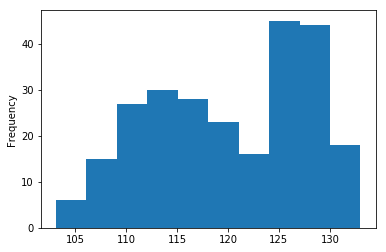

In [285]:
df1['PX_LAST'].plot.hist()

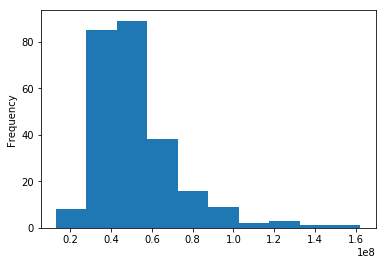

In [286]:
df1['PX_VOLUME'].plot.hist()

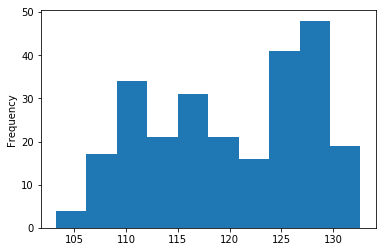

In [287]:
df1['VOLUME_WEIGHTED_AVG_PX'].plot.hist()

## 2.2 Repeat this exercise with 20 bins.

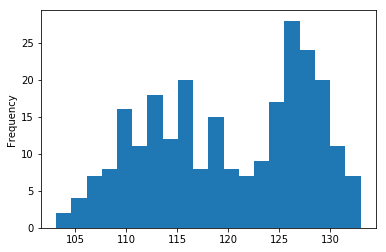

In [288]:
df1['PX_LAST'].plot.hist(bins=20)

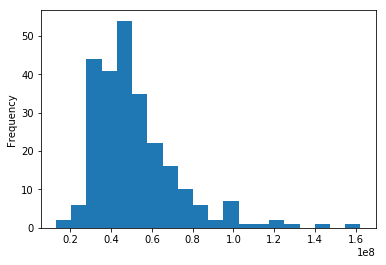

In [289]:
df1['PX_VOLUME'].plot.hist(bins=20)

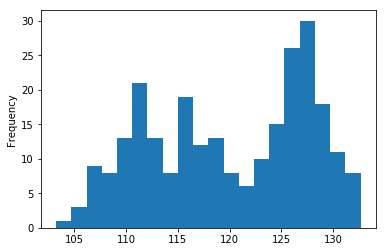

In [290]:
df1['VOLUME_WEIGHTED_AVG_PX'].plot.hist(bins=20)

## 3.1 Compute the daily tracking error between closing price and VWAP data series (using actual data). 


### tracking error = sqrt(var(r_p-r_b))

In [320]:
def get_trackingerror(name1,name2,num):
    r_p = df1[name1].pct_change(periods=num)
    r_b = df1[name2].pct_change(periods=num)
    diff = r_p-r_b
    tr_err = math.sqrt(diff.var())
    print('Tracking error between ' + str(name1) + ' and '+ str(name2) + ' is '+ str(tr_err))
    return tr_err

In [321]:
get_trackingerror('PX_LAST','VOLUME_WEIGHTED_AVG_PX',1)

Tracking error between PX_LAST and VOLUME_WEIGHTED_AVG_PX is 0.01023091788111535


0.01023091788111535

## 3.2 Repeat this exercise with daily return data for both series. Note: Tracking error is defined as standard deviation of the difference between the two time series).

In [322]:
get_trackingerror('PX_OPEN','VOLUME_WEIGHTED_AVG_PX',1)

Tracking error between PX_OPEN and VOLUME_WEIGHTED_AVG_PX is 0.01664435073700359


0.01664435073700359

In [323]:
get_trackingerror('PX_HIGH','VOLUME_WEIGHTED_AVG_PX',1)

Tracking error between PX_HIGH and VOLUME_WEIGHTED_AVG_PX is 0.005799380562450735


0.005799380562450735

In [324]:
get_trackingerror('PX_LOW','VOLUME_WEIGHTED_AVG_PX',1)

Tracking error between PX_LOW and VOLUME_WEIGHTED_AVG_PX is 0.010015896082854723


0.010015896082854723

## 4.1 Compute the correlation between 5-day changes of the closing price and volume (corresponding to weekly changes). 

In [325]:
get_trackingerror('PX_LAST','VOLUME_WEIGHTED_AVG_PX',5)

Tracking error between PX_LAST and VOLUME_WEIGHTED_AVG_PX is 0.009489711335778825


0.009489711335778825

In [326]:
get_trackingerror('PX_OPEN','VOLUME_WEIGHTED_AVG_PX',5)

Tracking error between PX_OPEN and VOLUME_WEIGHTED_AVG_PX is 0.014851763110094346


0.014851763110094346

In [327]:
get_trackingerror('PX_HIGH','VOLUME_WEIGHTED_AVG_PX',5)

Tracking error between PX_HIGH and VOLUME_WEIGHTED_AVG_PX is 0.008363070752223855


0.008363070752223855

In [328]:
get_trackingerror('PX_LOW','VOLUME_WEIGHTED_AVG_PX',5)

Tracking error between PX_LOW and VOLUME_WEIGHTED_AVG_PX is 0.012011306450757311


0.012011306450757311

## 4.2 Furthermore, compute the slope and R-squared of the linear regression line and create a scatter plot showing the relationship between these two weekly change series. 

In [334]:
import statsmodels.formula.api as sm


In [346]:
def linear_regression(name1, name2, num):
    df_x = df1[name1].pct_change()
    df_y = df1[name2].pct_change()
    df_x = df_x.fillna(0) # Replace all NA/null data with value.
    df_y = df_y.fillna(0) # Replace all NA/null data with value.
    
    mod = sm.OLS(df_b, df_a)
    res = mod.fit()
    print(res.summary())
    
    return res.summary()

In [347]:
linear_regression('PX_LAST', 'VOLUME_WEIGHTED_AVG_PX', 14)

                              OLS Regression Results                              
Dep. Variable:     VOLUME_WEIGHTED_AVG_PX   R-squared:                       0.633
Model:                                OLS   Adj. R-squared:                  0.632
Method:                     Least Squares   F-statistic:                     433.6
Date:                    Tue, 26 Mar 2019   Prob (F-statistic):           1.28e-56
Time:                            21:21:36   Log-Likelihood:                 844.44
No. Observations:                     252   AIC:                            -1687.
Df Residuals:                         251   BIC:                            -1683.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PX_LAST     

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     VOLUME_WEIGHTED_AVG_PX   R-squared:                       0.633
Model:                                OLS   Adj. R-squared:                  0.632
Method:                     Least Squares   F-statistic:                     433.6
Date:                    Tue, 26 Mar 2019   Prob (F-statistic):           1.28e-56
Time:                            21:21:36   Log-Likelihood:                 844.44
No. Observations:                     252   AIC:                            -1687.
Df Residuals:                         251   BIC:                            -1683.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PX_LAST        0.6637      0.032     20.824      0.000       0.601       0.726
==============================================================================
Omnibus:                       32.273   Durbin-Watson:                   2.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.841
Skew:                          -0.261   Prob(JB):                     5.90e-37
Kurtosis:                       6.952   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [340]:
df_a = df1['PX_LAST'].pct_change()
df_b = df1['VOLUME_WEIGHTED_AVG_PX'].pct_change()
df_a = df_a.fillna(0) # Replace all NA/null data with value.
df_b = df_b.fillna(0) # Replace all NA/null data with value.
df_a.head()
mod = sm.OLS(df_b, df_a)
res = mod.fit()
print(res.summary())

## 4.3 Repeat this exercise for closing price and number of trades.

In [348]:
linear_regression('PX_LAST', 'NUM_TRADES', 14)

                              OLS Regression Results                              
Dep. Variable:     VOLUME_WEIGHTED_AVG_PX   R-squared:                       0.633
Model:                                OLS   Adj. R-squared:                  0.632
Method:                     Least Squares   F-statistic:                     433.6
Date:                    Tue, 26 Mar 2019   Prob (F-statistic):           1.28e-56
Time:                            21:23:05   Log-Likelihood:                 844.44
No. Observations:                     252   AIC:                            -1687.
Df Residuals:                         251   BIC:                            -1683.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PX_LAST     

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     VOLUME_WEIGHTED_AVG_PX   R-squared:                       0.633
Model:                                OLS   Adj. R-squared:                  0.632
Method:                     Least Squares   F-statistic:                     433.6
Date:                    Tue, 26 Mar 2019   Prob (F-statistic):           1.28e-56
Time:                            21:23:05   Log-Likelihood:                 844.44
No. Observations:                     252   AIC:                            -1687.
Df Residuals:                         251   BIC:                            -1683.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PX_LAST        0.6637      0.032     20.824      0.000       0.601       0.726
==============================================================================
Omnibus:                       32.273   Durbin-Watson:                   2.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.841
Skew:                          -0.261   Prob(JB):                     5.90e-37
Kurtosis:                       6.952   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Exercise 2
In this exercise, we will conduct analysis of the hourly transaction data (corresponding to data in ‘1hr’ worksheet). Note: here three categories of hourly transaction data are shown: trade, bid and ask. Columns labeled BarTp=T correspond to actual trade data. Columns labeled BarTp=B correspond to (best) bid prices, while columns labeled BarTp=A correspond to (best) ask / offer prices. In each category, the High and Low data correspond to highest and lowest transaction data within a given hour, respectively. Volume data corresponds to the total volume of transaction data during the hour. Open and Close prices (OPEN and PX_LAST) correspond to the first and last available transaction data that occurred during a given hour, respectively.

## 1. Create an Open-High-Low-Close chart of the hourly trade data (section labeled BarTp=T).


In [356]:
import matplotlib.pyplot as plt
import seaborn as sns


'''
df1 = pd.read_excel(xls, 'Daily')
df2 = pd.read_excel(xls, '1hr')
df3 = pd.read_excel(xls, '5 min')
df4 = pd.read_excel(xls, '1min')
df5 = pd.read_excel(xls, 'Tick')
'''

'''
df2_T_: BarTp=T
df2_A_: BarTp=A
df2_B_: BarTp=B
'''

'\ndf2_T_: BarTp=T\ndf2_A_: BarTp=A\ndf2_B_: BarTp=B\n'

In [354]:
df2_T_.head()

1,Date,OPEN,HIGH,LOW,LAST_PRICE,NUMBER_TICKS,VOLUME,VALUE
1,2016-01-04 10:00:00,102.68,103.59,102.38,103.28,27462,4819634,496242144
2,2016-01-04 10:30:00,103.28,103.935,103.01,103.338,22162,3886368,401830496
3,2016-01-04 11:00:00,103.33,103.47,102.5,103.4,18603,3251998,335462688
4,2016-01-04 11:30:00,103.39,103.9,103.205,103.83,14243,2484697,257469152
5,2016-01-04 12:00:00,103.83,104.05,103.69,103.87,12023,2274711,236232304


In [362]:
df2_T_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 1 to 207
Data columns (total 8 columns):
Date            207 non-null object
OPEN            207 non-null object
HIGH            207 non-null object
LOW             207 non-null object
LAST_PRICE      207 non-null object
NUMBER_TICKS    207 non-null object
VOLUME          207 non-null object
VALUE           207 non-null object
dtypes: object(8)
memory usage: 14.6+ KB


In [364]:
df2_T_chart = df2_T_[['OPEN','HIGH','LOW','LAST_PRICE']]
#ax = df2_T_.plot.box()
df2_T_chart.head()

1,OPEN,HIGH,LOW,LAST_PRICE
1,102.68,103.59,102.38,103.28
2,103.28,103.935,103.01,103.338
3,103.33,103.47,102.5,103.4
4,103.39,103.9,103.205,103.83
5,103.83,104.05,103.69,103.87


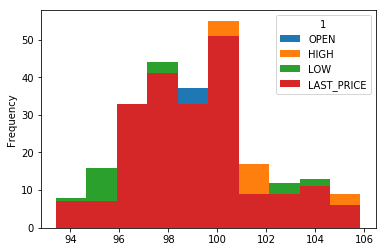

In [366]:
df2_T_chart.plot.hist()

## 2.1 Create a histogram of hourly Bid-Ask spread with 10 bins. Note: Bid-Ask spread is defined as the difference of PX_LAST in sections labeled BarTyp=A and BarTyp=B respectively. 


In [367]:
df2_A_.head()

1,Date,OPEN,HIGH,LOW,LAST_PRICE,NUMBER_TICKS,VOLUME,VALUE
1,2016-01-04 10:00:00,102.68,103.57,102.42,103.27,77265,457872,47126300
2,2016-01-04 10:30:00,103.27,103.93,103,103.33,56858,393803,40699960
3,2016-01-04 11:00:00,103.33,103.46,102.86,103.39,59773,398852,41137492
4,2016-01-04 11:30:00,103.39,103.89,103.2,103.82,43095,282755,29291924
5,2016-01-04 12:00:00,103.82,104.04,103.68,103.87,35724,256086,26591408


In [394]:
df2_A_.head()

1,Date,OPEN,HIGH,LOW,LAST_PRICE,NUMBER_TICKS,VOLUME,VALUE
3,2016-01-04 10:00:00,102.69,103.59,102.43,103.28,75173,477955,49204884
4,2016-01-04 10:30:00,103.28,103.94,103.01,103.34,55279,364388,37657056
5,2016-01-04 11:00:00,103.34,103.47,102.87,103.4,62990,407426,42028720
6,2016-01-04 11:30:00,103.4,103.9,103.21,103.83,42505,294020,30463552
7,2016-01-04 12:00:00,103.83,104.05,103.69,103.88,37116,259487,26949260


In [395]:
df2_B_.head()

1,Date,OPEN,HIGH,LOW,LAST_PRICE,NUMBER_TICKS,VOLUME,VALUE
1,2016-01-04 10:00:00,102.68,103.57,102.42,103.27,77265,457872,47126300
2,2016-01-04 10:30:00,103.27,103.93,103,103.33,56858,393803,40699960
3,2016-01-04 11:00:00,103.33,103.46,102.86,103.39,59773,398852,41137492
4,2016-01-04 11:30:00,103.39,103.89,103.2,103.82,43095,282755,29291924
5,2016-01-04 12:00:00,103.82,104.04,103.68,103.87,35724,256086,26591408


In [385]:
df2_Bid = df2_B_['LAST_PRICE'].astype(float)
df2_Ask = df2_A_['LAST_PRICE'].astype(float)
df2_BAS = df2_Bid - df2_Ask

In [386]:
df2_BAS.head()

1     NaN
2     NaN
3    0.11
4    0.48
5    0.47
Name: LAST_PRICE, dtype: float64

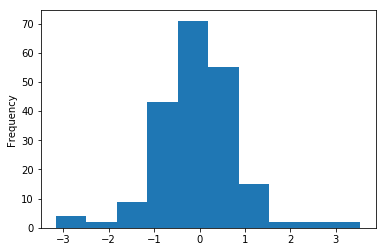

In [387]:
df2_BAS.plot.hist(bins=10)

## 2.2 Similarly, create a histogram of hourly changes in Bid-Ask spread with the same number of bins.

In [399]:
df2_BAS_changes = df2_BAS.pct_change().fillna(0)
#df2_BAS_changes = df2_BAS_changes.fillna(0)
#df2_BAS_changes.plot.hist()
df2_BAS_changes

1       0.000000
2       0.000000
3       0.000000
4       3.363636
5      -0.020833
6       1.021277
7      -0.200000
8      -1.210526
9      -4.687500
10     -0.830508
11    -13.100000
12     -1.471074
13     -0.877193
14    -17.428571
15     -1.313043
16     -1.805556
17      0.413793
18      1.048780
19      0.285714
20     -0.916667
21     -5.888889
22      0.181818
23     -1.942308
24      0.551020
25     -0.618421
26      4.000000
27     -0.662069
28     -1.244898
29     -4.166667
30     -0.131579
         ...    
180    -0.407407
181     0.531250
182    -1.040816
183    23.500000
184    -0.734694
185     1.615385
186    -0.117647
187     0.200000
188    -1.972222
189     0.342857
190    -1.787234
191    -0.378378
192    -0.652174
193     8.625000
194     0.337662
195     0.291262
196    -0.849624
197    -7.250000
198    -0.336000
199    -0.253012
200    -0.532258
201    -0.896552
202    -7.666667
203     0.450000
204    -0.620690
205    -3.000000
206    -4.000000
207    -0.2575

## 3.1 Compute the correlation between the difference of High and Low prices (High minus Low) and the Volume for the hourly trade data.


## 3.2 Furthermore, compute the slope and R-squared of the linear regression line and create a scatter plot showing the relationship between these two series.

## 4. Repeat the last step between the difference of High and Low prices and the (hourly) changes of the Bid-Ask spread.

# Exercise 3 (Extra Credit)
Repeat Exercise 2 for 5-minute and 1-minute data frequencies. Note: Relationships can significantly change depending on the observation frequency.

## Repeat Exercise 2 for 5-minute and 1-minute data frequencies. Note: Relationships can significantly change depending on the observation frequency.